# Clustering Exercise Using ALS Patient Data

***KJ MoChroi  
DSC 630 Winter 2022  
Bellevue University***

##### 1. Remove any data that is not relevant to the patient’s ALS condition.

First I will import the data, look at it, and remove any unnecesary columns. This method is based on (Applied Predictive Analytics) page 119.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [2]:
als_df = pd.read_csv("als_data.csv")

In [3]:
als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [4]:
als_df.drop(['ID', 'SubjectID'], axis=1, inplace=True)

For this next section I will compare the correlations to see if there are redundant variables to remove

In [5]:
# create correlation matrix
corr_matrix = als_df.corr()

In [6]:
# this function highlights high correlation values 
def high_corr(val):
    color = 'yellow' if (val > 0.9 or val < -0.9) else ''
    return 'background-color: {}'.format(color)

corr_matrix.style.applymap(high_corr)

According to the correlation matrix above, there are two redundant variables. I will remove 'Hematocrit_max' and 'Hematocrit_min' and I will leave 'Hematocrit_median' in the dataframe.

In [7]:
als_df.drop(['Hematocrit_max', 'Hematocrit_min'], axis=1, inplace=True)

In [8]:
# Any missing data?
als_df.isna().sum().sum()

0

##### 2. Apply a standard scalar to the data.  

In [9]:
# create object
scalar = StandardScaler()

In [10]:
# standardization 
als_scaled = scalar.fit_transform(als_df) 

In [11]:
als_scaled

array([[ 0.91713698,  3.08941722, -1.30078105, ..., -0.88037551,
         0.46305355,  1.86853157],
       [-0.57487867, -0.62201561, -1.11240084, ...,  0.1926645 ,
        -1.13720768, -0.41915124],
       [-1.45253494,  0.92441474,  1.14816173, ..., -0.88037551,
        -1.13720768, -0.41915124],
       ...,
       [-0.6626443 , -0.31272954,  0.01788044, ...,  2.33874452,
         0.46305355, -0.41915124],
       [-1.54030057,  0.61512867,  0.01788044, ..., -0.88037551,
        -1.13720768, -0.41915124],
       [-0.57487867,  0.3058426 ,  0.39464087, ..., -1.95341552,
        -1.13720768, -0.41915124]])

##### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.  

*The following code was sourced from a tutorial online that can be found at the following website: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py*

For n_clusters = 2 The average silhouette_score is : 0.08038173811738773
For n_clusters = 3 The average silhouette_score is : 0.07040893083421151
For n_clusters = 4 The average silhouette_score is : 0.05210973554529861
For n_clusters = 5 The average silhouette_score is : 0.05712969619618897
For n_clusters = 6 The average silhouette_score is : 0.04047689865763422
For n_clusters = 7 The average silhouette_score is : 0.04361954954738954
For n_clusters = 8 The average silhouette_score is : 0.04426670836990529
For n_clusters = 9 The average silhouette_score is : 0.03746952706901966
For n_clusters = 10 The average silhouette_score is : 0.036686234733113124


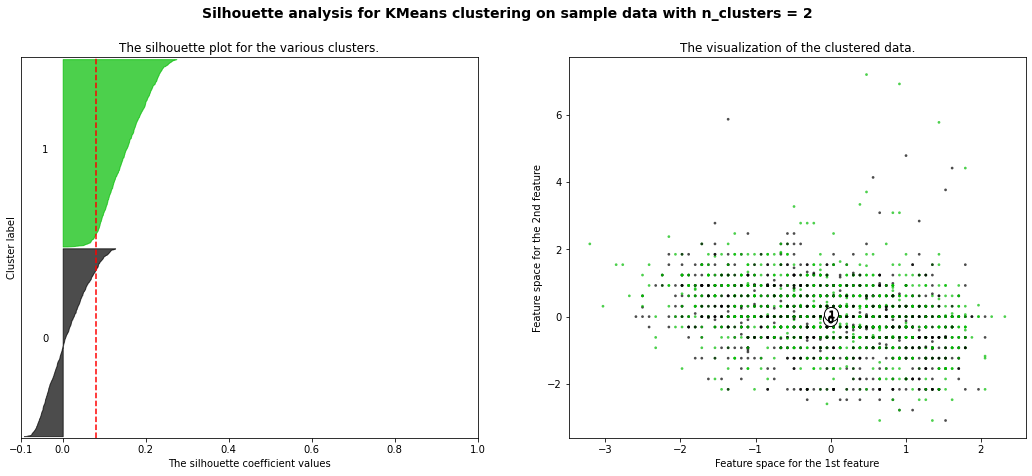

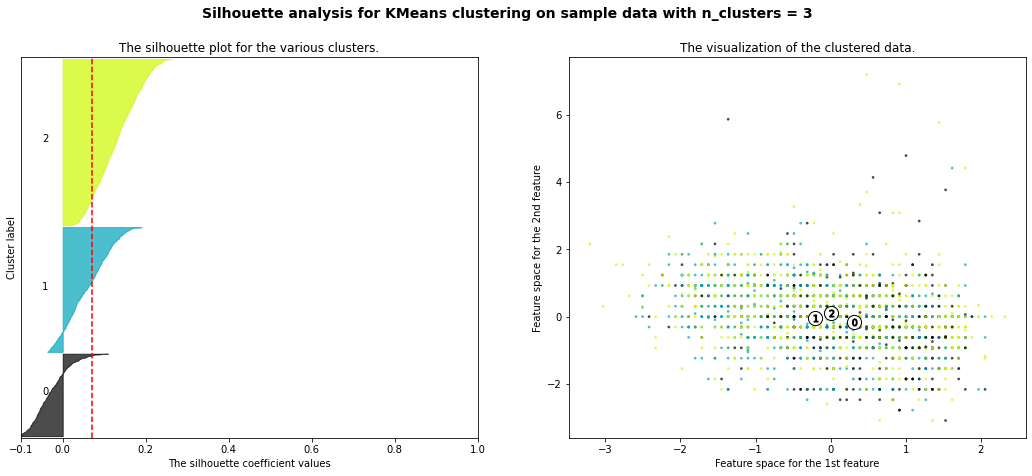

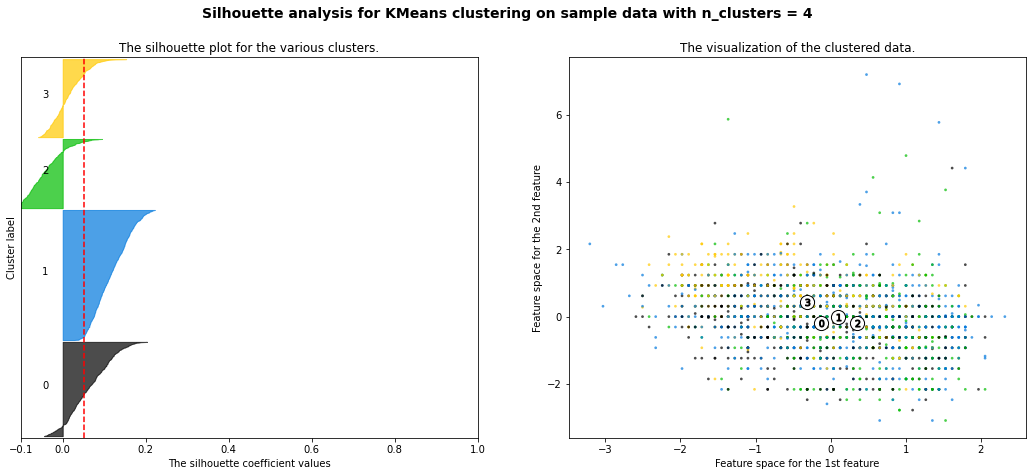

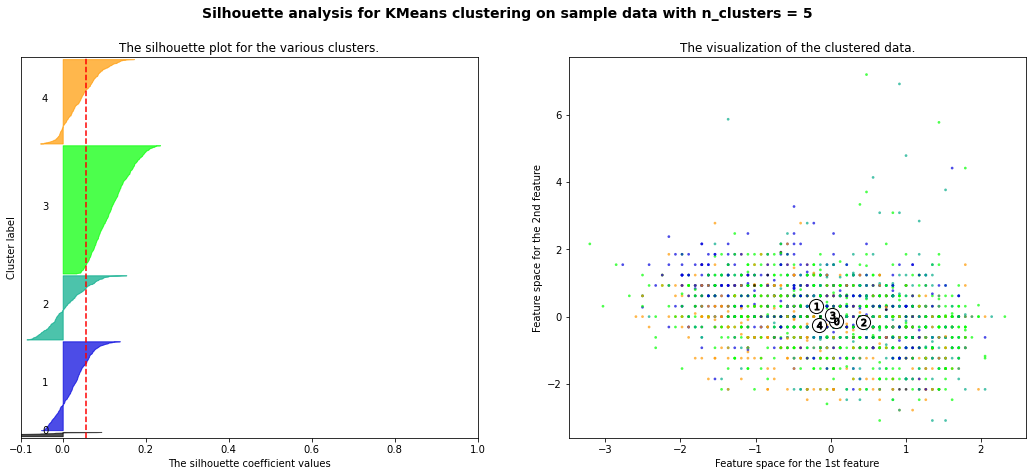

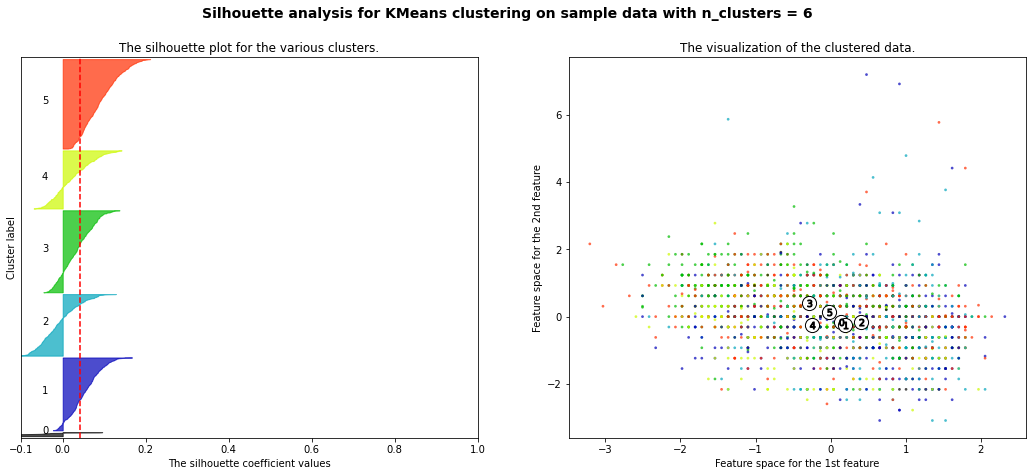

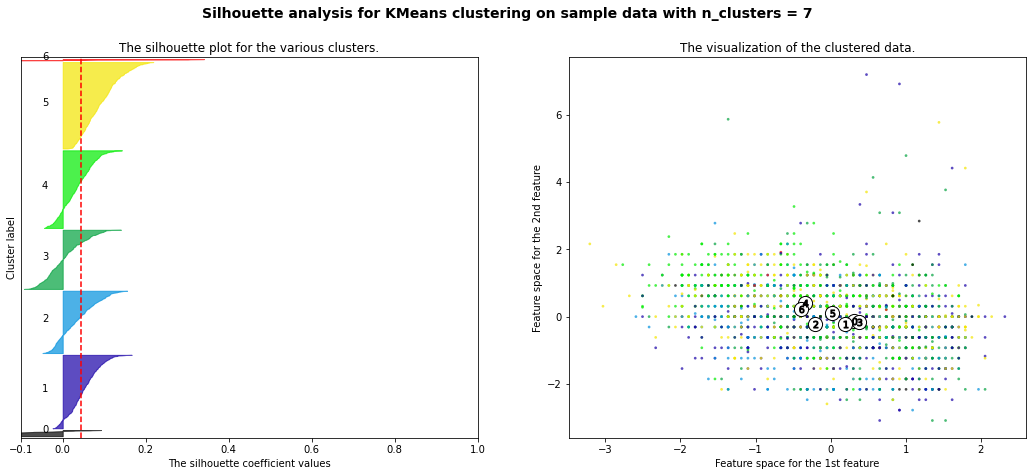

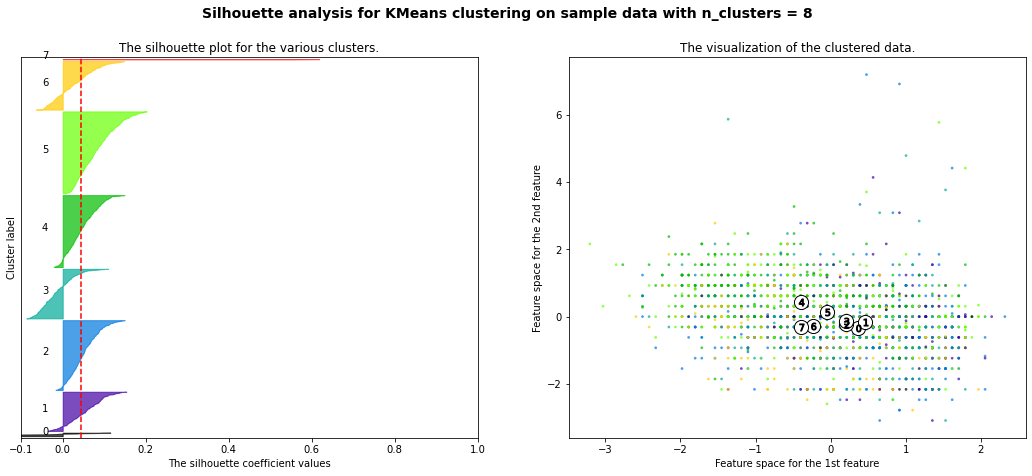

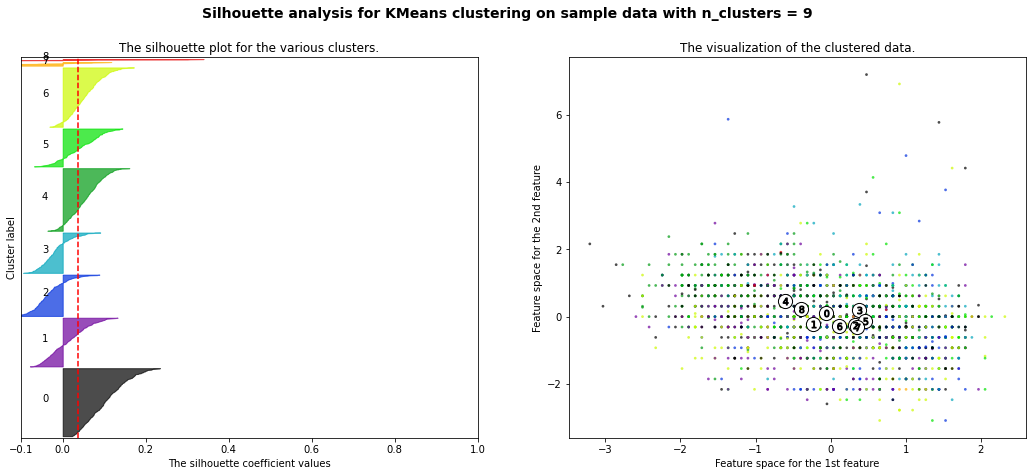

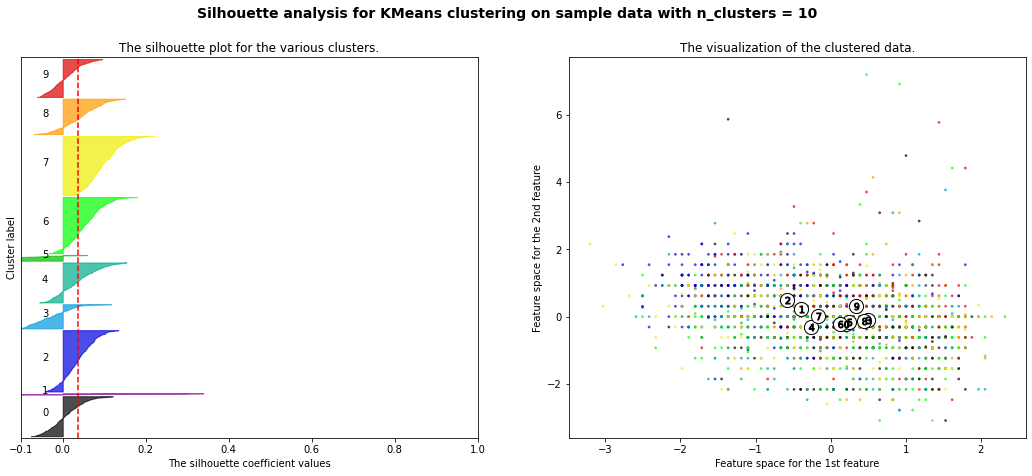

In [12]:
X = als_scaled

range_n_clusters = [2, 3, 4, 5, 6,7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0, 0.5, 'WCSS')

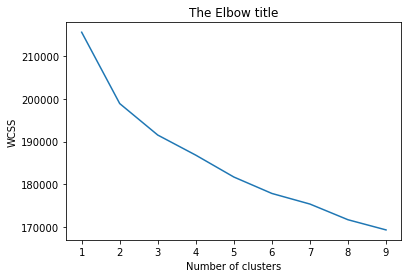

In [13]:
# An alternative approach: WCSS and Elbow Plot
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

##### 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

After reviewing both the silhouette scores and the elbow plot, both of these metrics indicate that the best choice for k is k=2. The silhouette score, though very low for all values of k, was the highest for k=2. Furthermore, the "elbow" of the elbow plot is also at k=2.

##### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [14]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
label = kmeans.fit_predict(X)

##### 6. Fit a PCA transformation with two features to the scaled data.  

In [15]:
pca_2 = PCA(n_components=2)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)

##### 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value. 

<AxesSubplot:>

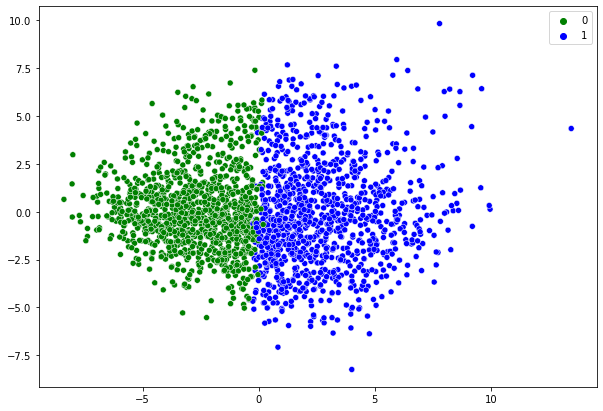

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=label, palette = ['green', 'blue'])

##### 8. Summarize your results and make a conclusion.  

In conclusion, when doing a k-means clustering unsupervised learning algorithm on the ALS dataframe, you will find that k=2 is the optimal number of clusters. This can be seen from the silhouette scores for each value of k, with k=2 being the highest, and also from the elbow plot which has an elbow at k=2. After doing a PCA transform to reduce the number of variables, we are able to two-dimensionally plot the resultant clusters via scatterplot.